In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [2]:
z_df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/Zoo.csv')
z_df.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [3]:
z_df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [4]:
z_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
z_df.describe

<bound method NDFrame.describe of     animal name  hair  feathers  eggs  ...  tail  domestic  catsize  type
0      aardvark     1         0     0  ...     0         0        1     1
1      antelope     1         0     0  ...     1         0        1     1
2          bass     0         0     1  ...     1         0        0     4
3          bear     1         0     0  ...     0         0        1     1
4          boar     1         0     0  ...     1         0        1     1
..          ...   ...       ...   ...  ...   ...       ...      ...   ...
96      wallaby     1         0     0  ...     1         0        1     1
97         wasp     1         0     1  ...     0         0        0     6
98         wolf     1         0     0  ...     1         0        1     1
99         worm     0         0     1  ...     0         0        0     7
100        wren     0         1     1  ...     1         0        0     2

[101 rows x 18 columns]>

In [6]:
z_df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [7]:
#Scaling the data (leaving out the target variable, and the taking only the numerical data for input)
df1= z_df.iloc[:,1:17]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(df1)
df_norm = sc.transform(df1)
df_norm                     #Normalised dataset

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 16)
pca_values = pca.fit_transform(df_norm)
pca_values

array([[-2.53525586, -0.26027764,  1.24184209, ...,  0.46003753,
         0.13353213,  0.09036509],
       [-2.87735435, -0.40154709, -0.1000181 , ..., -0.01872462,
        -0.02855448, -0.06995038],
       [ 1.76100295,  3.70559205, -0.18010521, ...,  0.24519814,
        -0.00710216,  0.03432821],
       ...,
       [-2.81897453,  0.10708083,  0.13685166, ..., -0.03421561,
        -0.04553159, -0.02909899],
       [ 2.01881534, -1.25779288,  1.40920411, ..., -0.50614542,
        -0.22293974,  0.0170063 ],
       [ 2.04997054, -1.90737976, -2.49732162, ...,  0.23108799,
         0.13215847, -0.03497545]])

In [9]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.29191091, 0.20882904, 0.14778223, 0.07693359, 0.05962114,
       0.04662709, 0.03517581, 0.03202669, 0.02798703, 0.02374091,
       0.0173489 , 0.01317047, 0.00809636, 0.00737139, 0.00226697,
       0.00111146])

In [10]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([29.19, 50.07, 64.85, 72.54, 78.5 , 83.16, 86.68, 89.88, 92.68,
       95.05, 96.78, 98.1 , 98.91, 99.65, 99.88, 99.99])

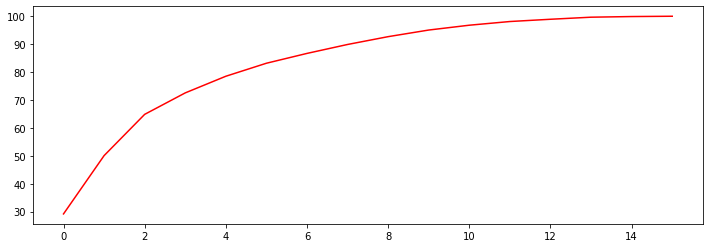

In [11]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

In [12]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:14],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14']),
                     z_df[['type']]], axis = 1)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,type
0,-2.535256,-0.260278,1.241842,-1.065734,-0.296433,0.261767,-0.041032,-0.301902,1.287573,0.250864,-0.137726,-0.725658,-0.534541,0.460038,1
1,-2.877354,-0.401547,-0.100018,-0.014988,-0.308969,-0.627116,0.796777,0.345511,-0.552024,0.192473,0.211313,-0.145765,-0.087887,-0.018725,1
2,1.761003,3.705592,-0.180105,0.578327,-0.327066,-0.379035,-0.560420,-0.200556,-0.158270,-0.511661,-0.282661,-0.108516,0.090267,0.245198,4
3,-2.535256,-0.260278,1.241842,-1.065734,-0.296433,0.261767,-0.041032,-0.301902,1.287573,0.250864,-0.137726,-0.725658,-0.534541,0.460038,1
4,-2.818975,0.107081,0.136852,-1.178338,0.147460,0.069023,-0.144118,0.065897,-0.119328,-0.445570,-0.117144,-0.159293,0.036293,-0.034216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-2.764120,-0.065219,-0.409317,0.151818,-0.235706,-0.786741,0.910330,0.476138,0.099124,0.048053,0.514294,-0.101619,0.153061,-0.265474,1
97,1.667523,-3.219581,2.723445,0.743239,2.290063,-0.896837,1.661100,-1.217305,-0.182554,-0.242038,-0.558083,-0.298778,0.514703,0.539334,6
98,-2.818975,0.107081,0.136852,-1.178338,0.147460,0.069023,-0.144118,0.065897,-0.119328,-0.445570,-0.117144,-0.159293,0.036293,-0.034216,1
99,2.018815,-1.257793,1.409204,0.715264,-1.014103,-0.963336,0.479793,1.411127,1.790623,-0.041930,0.337558,0.855498,0.513896,-0.506145,7


In [13]:
array = finalDf.values
X = array[:,0:14]
Y = array[:,14]

#Selecting the model validation technique

1 Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np
test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
np.round(result, 4)

0.9677

2 Cross Validation

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression(max_iter=400)
results = cross_val_score(model, X, Y, cv=kfold)
print('Result:',np.round(results.mean(),4),'\n','\n','Standard dev:',np.round(results.std(),4))

Result: 0.96 
 
 Standard dev: 0.0663


#Looks like train test split is the best model validation Technique, we will move forward with this

#KNN Classification

In [16]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_params_)

0.9504761904761905
{'n_neighbors': 1}


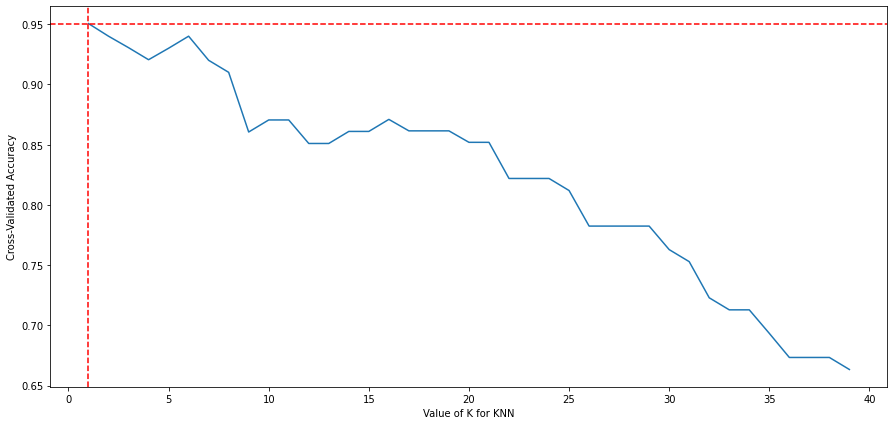

In [17]:

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(15,7))
plt.plot(k_range, k_scores)
plt.axhline(y=0.9504761904761905, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [18]:
#KNN Classification
model = KNeighborsClassifier(n_neighbors=1) #making the model
model.fit(X_train , Y_train) #training the model
y_pred = model.predict(X_test) #predicting on the test dataset
acc = accuracy_score(Y_test, y_pred) * 100 
print("Accuracy =", acc)

Accuracy = 93.54838709677419


#Now, let's try some Ensemble methods to see if we can further increase the accuracy of the model

1- Bagging

In [19]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 96.7741935483871


2 Boosting

In [20]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
seed=7

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 87.09677419354838


In [ ]:
3 Random Forest

In [21]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 96.7741935483871


#Hence we can say, KNN with some Esemble techniques are the best Model for this Problem